# **Imports**

In [ ]:
#!pip install graphviz
import graphviz
from prettytable import PrettyTable

# **NFA**

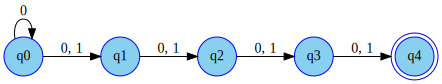

In [ ]:
# create a new graph
g = graphviz.Digraph(node_attr={'color': 'blue'})

# set the graph attribute
g.graph_attr['rankdir'] = 'LR'
# add nodes
g.node('q0', shape='circle', style='filled', fillcolor='#89CFF0')
g.node('q1', shape='circle', style='filled', fillcolor='#89CFF0')
g.node('q2', shape='circle', style='filled', fillcolor='#89CFF0')
g.node('q3', shape='circle', style='filled', fillcolor='#89CFF0')
g.node('q4', shape='doublecircle', style='filled', fillcolor='#89CFF0')

# add edges
g.edge('q0', 'q0', label='0')
g.edge('q0', 'q1', label='0, 1')
g.edge('q1', 'q2', label='0, 1')
g.edge('q2', 'q3', label='0, 1')
g.edge('q3', 'q4', label='0, 1')


g

In [ ]:

# Create a new table wdith column headers
table = PrettyTable(['State', '0', '1'])

# Add rows to the table
table.add_row(['q0', 'q0', 'q0,q1'])
table.add_row(['q1', 'q2', 'q2'])
table.add_row(['q2', 'q3', 'q3'])
table.add_row(['q3', 'q4', 'q4'])
table.add_row(['q4', '-', '-'])

# Print the table
print(table)

+-------+----+-------+
| State | 0  |   1   |
+-------+----+-------+
|   q0  | q0 | q0,q1 |
|   q1  | q2 |   q2  |
|   q2  | q3 |   q3  |
|   q3  | q4 |   q4  |
|   q4  | -  |   -   |
+-------+----+-------+


In [ ]:
NFA = {
  ('q0', 0) : ['q0'],
  ('q0', 1) : ['q0', 'q1'],
  ('q1', 0) : ['q2'],
  ('q1', 1) : ['q2'],
  ('q2', 0) : ['q3'],
  ('q2', 1) : ['q3'],
  ('q3', 0) : ['q4'],
  ('q3', 1) : ['q4'],
}


# **Convert from NFA to DFA**

In [ ]:
def NFA_to_DFA(NFA, start, end):
    DFA = {}
    states = [[start]]
    while states:
        current = states.pop(0)
        if tuple(current) in DFA:
            continue
        transitions = {}
        for val in range(2):
            val_transitions = []
            for state in current:
                if (state, val) in NFA:
                    val_transitions.extend(NFA[(state, val)])
            val_transitions = list(set(val_transitions))
            transitions[val] = val_transitions
            if val_transitions not in states and val_transitions != []:
                states.append(val_transitions)

        # Add the current state to the DFA with its transitions
        DFA[tuple(current)] = transitions

    return DFA
DFA=NFA_to_DFA(NFA,'q0','q4')

In [ ]:
DFA_new={}
count=0
for key, value in DFA.items():

  for val in range(2):
    count+=1
    value1, *other_values = key
    DFA_new[(value1, *other_values,val)] = DFA[(key)][val]

DFA_new

{('q0', 0): ['q0'],
 ('q0', 1): ['q0', 'q1'],
 ('q0', 'q1', 0): ['q0', 'q2'],
 ('q0', 'q1', 1): ['q0', 'q1', 'q2'],
 ('q0', 'q2', 0): ['q0', 'q3'],
 ('q0', 'q2', 1): ['q0', 'q1', 'q3'],
 ('q0', 'q1', 'q2', 0): ['q0', 'q3', 'q2'],
 ('q0', 'q1', 'q2', 1): ['q0', 'q1', 'q3', 'q2'],
 ('q0', 'q3', 0): ['q4', 'q0'],
 ('q0', 'q3', 1): ['q4', 'q0', 'q1'],
 ('q0', 'q1', 'q3', 0): ['q4', 'q0', 'q2'],
 ('q0', 'q1', 'q3', 1): ['q4', 'q0', 'q1', 'q2'],
 ('q0', 'q3', 'q2', 0): ['q4', 'q0', 'q3'],
 ('q0', 'q3', 'q2', 1): ['q4', 'q0', 'q1', 'q3'],
 ('q0', 'q1', 'q3', 'q2', 0): ['q4', 'q0', 'q3', 'q2'],
 ('q0', 'q1', 'q3', 'q2', 1): ['q2', 'q3', 'q4', 'q0', 'q1'],
 ('q4', 'q0', 0): ['q0'],
 ('q4', 'q0', 1): ['q0', 'q1'],
 ('q4', 'q0', 'q1', 0): ['q0', 'q2'],
 ('q4', 'q0', 'q1', 1): ['q0', 'q1', 'q2'],
 ('q4', 'q0', 'q2', 0): ['q0', 'q3'],
 ('q4', 'q0', 'q2', 1): ['q0', 'q1', 'q3'],
 ('q4', 'q0', 'q1', 'q2', 0): ['q0', 'q3', 'q2'],
 ('q4', 'q0', 'q1', 'q2', 1): ['q0', 'q1', 'q3', 'q2'],
 ('q4', 'q0', 'q

# **DFA**

In [ ]:

# Create a new table with column headers
table = PrettyTable(['Name', 'State', '0', '1'])

# Add rows to the table
table.add_row(['A', 'q0', 'q0', 'q0,q1'])
table.add_row(['B', 'q0,q1', 'q0,q2', 'q0,q1,q2'])
table.add_row(['C', 'q0,q2', 'q0,q3', 'q0,q1,q3'])
table.add_row(['D', 'q0,q1,q2', 'q0,q2,q3', 'q0,q1,q2,q3'])
table.add_row(['E', 'q0,q3', 'q0,q4', 'q0,q1,q4'])
table.add_row(['F', 'q0,q1,q3', 'q0,q2,q4', 'q0,q1,q2,q4'])
table.add_row(['G', 'q0,q2,q3', 'q0,q3,q4', 'q0,q1,q3,q4'])
table.add_row(['H', 'q0,q1,q2,q3', 'q0,q2,q3,q4', 'q0,q1,q2,q3,q4'])
table.add_row(['I', 'q0,q4', 'q0', 'q0,q1'])
table.add_row(['J', 'q0,q1,q4', 'q0,q2', 'q0,q1,q2'])
table.add_row(['k', 'q0,q2,q4', 'q0,q3', 'q0,q1,q3'])
table.add_row(['L', 'q0,q1,q2,q4', 'q0,q2,q3', 'q0,q1,q2,q3'])
table.add_row(['M', 'q0,q3,q4', 'q0,q4', 'q0,q1,q4'])
table.add_row(['N', 'q0,q1,q3,q4', 'q0,q2,q4', 'q0,q1,q2,q4'])
table.add_row(['O', 'q0,q2,q3,q4', 'q0,q3,q4', 'q0,q1,q3,q4'])
table.add_row(['p', 'q0,q1,q2,q3,q4', 'q0,q2,q3,q4', 'q0,q1,q2,q3,q4'])
# Print the table
print(table)


+------+----------------+-------------+----------------+
| Name |     State      |      0      |       1        |
+------+----------------+-------------+----------------+
|  A   |       q0       |      q0     |     q0,q1      |
|  B   |     q0,q1      |    q0,q2    |    q0,q1,q2    |
|  C   |     q0,q2      |    q0,q3    |    q0,q1,q3    |
|  D   |    q0,q1,q2    |   q0,q2,q3  |  q0,q1,q2,q3   |
|  E   |     q0,q3      |    q0,q4    |    q0,q1,q4    |
|  F   |    q0,q1,q3    |   q0,q2,q4  |  q0,q1,q2,q4   |
|  G   |    q0,q2,q3    |   q0,q3,q4  |  q0,q1,q3,q4   |
|  H   |  q0,q1,q2,q3   | q0,q2,q3,q4 | q0,q1,q2,q3,q4 |
|  I   |     q0,q4      |      q0     |     q0,q1      |
|  J   |    q0,q1,q4    |    q0,q2    |    q0,q1,q2    |
|  k   |    q0,q2,q4    |    q0,q3    |    q0,q1,q3    |
|  L   |  q0,q1,q2,q4   |   q0,q2,q3  |  q0,q1,q2,q3   |
|  M   |    q0,q3,q4    |    q0,q4    |    q0,q1,q4    |
|  N   |  q0,q1,q3,q4   |   q0,q2,q4  |  q0,q1,q2,q4   |
|  O   |  q0,q2,q3,q4   |   q0,

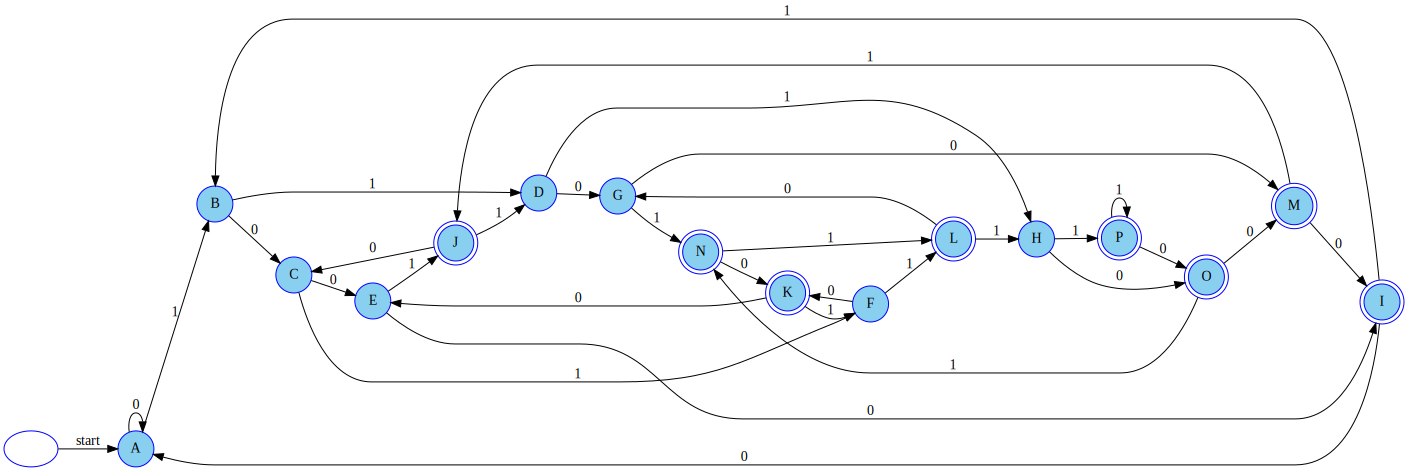

In [ ]:
# create a new graph
g = graphviz.Digraph(node_attr={'color': 'blue'})

# set the graph attribute
g.graph_attr['rankdir'] = 'LR'
# add nodes
g.node('A', shape='circle', style='filled', fillcolor='#89CFF0', start='true')
g.node('B', shape='circle', style='filled', fillcolor='#89CFF0')
g.node('C', shape='circle', style='filled', fillcolor='#89CFF0')
g.node('D', shape='circle', style='filled', fillcolor='#89CFF0')
g.node('E', shape='circle', style='filled', fillcolor='#89CFF0')
g.node('F', shape='circle', style='filled', fillcolor='#89CFF0')
g.node('G', shape='circle', style='filled', fillcolor='#89CFF0')
g.node('H', shape='circle', style='filled', fillcolor='#89CFF0')
g.node('I', shape='doublecircle', style='filled', fillcolor='#89CFF0')
g.node('J', shape='doublecircle', style='filled', fillcolor='#89CFF0')
g.node('K', shape='doublecircle', style='filled', fillcolor='#89CFF0')
g.node('L', shape='doublecircle', style='filled', fillcolor='#89CFF0')
g.node('M', shape='doublecircle', style='filled', fillcolor='#89CFF0')
g.node('N', shape='doublecircle', style='filled', fillcolor='#89CFF0')
g.node('O', shape='doublecircle', style='filled', fillcolor='#89CFF0')
g.node('P', shape='doublecircle', style='filled', fillcolor='#89CFF0')


# add edges
g.edge('', 'A', label='start')
g.edge('A', 'A', label='0')
g.edge('A', 'B', label='1')
g.edge('B', 'C', label='0')
g.edge('B', 'D', label='1')
g.edge('C', 'E', label='0')
g.edge('C', 'F', label='1')
g.edge('D', 'G', label='0')
g.edge('D', 'H', label='1')
g.edge('E', 'I', label='0')
g.edge('E', 'J', label='1')
g.edge('F', 'K', label='0')
g.edge('F', 'L', label='1')
g.edge('G', 'M', label='0')
g.edge('G', 'N', label='1')
g.edge('H', 'O', label='0')
g.edge('H', 'P', label='1')
g.edge('I', 'A', label='0')
g.edge('I', 'B', label='1')
g.edge('J', 'C', label='0')
g.edge('J', 'D', label='1')
g.edge('K', 'E', label='0')
g.edge('K', 'F', label='1')
g.edge('L', 'G', label='0')
g.edge('L', 'H', label='1')
g.edge('M', 'I', label='0')
g.edge('M', 'J', label='1')
g.edge('N', 'K', label='0')
g.edge('N', 'L', label='1')
g.edge('O', 'M', label='0')
g.edge('O', 'N', label='1')
g.edge('P', 'O', label='0')
g.edge('P', 'P', label='1')



# render the graph to a file

g


In [ ]:
def DFA_count(input_string):
    current_states = {'A'}
    transitions = {
        'A': {'1': {'B'}, '0': {'A'}},
        'B': {'1': {'D'}, '0': {'C'}},
        'C': {'1': {'F'}, '0': {'E'}},
        'D': {'1': {'H'}, '0': {'G'}},
        'E': {'1': {'J'}, '0': {'I'}},
        'F': {'1': {'L'}, '0': {'K'}},
        'G': {'1': {'N'}, '0': {'M'}},
        'H': {'1': {'P'}, '0': {'O'}},
        'I': {'1': {'B'}, '0': {'A'}},
        'J': {'1': {'D'}, '0': {'C'}},
        'K': {'1': {'F'}, '0': {'E'}},
        'L': {'1': {'H'}, '0': {'G'}},
        'M': {'1': {'J'}, '0': {'I'}},
        'N': {'1': {'L'}, '0': {'K'}},
        'O': {'1': {'N'}, '0': {'M'}},
        'P': {'1': {'P'}, '0': {'O'}},

    }
    sett=set()
    listt=[]
    count = 0
    for i in range(len(input_string)):
        symbol = input_string[i]
        new_states = set()
        for state in current_states:
            if symbol in transitions[state]:
                new_states |= transitions[state][symbol]
        current_states = new_states
        listt.append(current_states)


        if i==len(input_string)-1:
          if 'I' or 'J'or 'K' or 'L' or 'M' or 'N' or 'O' or 'P' in current_states:
            print('the string ends at the final state')
    sett = set(map(frozenset, listt))
    print("number of states",len(sett))
    for i in listt:
      print(i)

In [ ]:
DFA_count('01001110010010101011110001101')

the string ends at the final state
number of states 16
{'A'}
{'B'}
{'C'}
{'E'}
{'J'}
{'D'}
{'H'}
{'O'}
{'M'}
{'J'}
{'C'}
{'E'}
{'J'}
{'C'}
{'F'}
{'K'}
{'F'}
{'K'}
{'F'}
{'L'}
{'H'}
{'P'}
{'O'}
{'M'}
{'I'}
{'B'}
{'D'}
{'G'}
{'N'}


In [ ]:
DFA_count('01001101011111000')

the string ends at the final state
number of states 16
{'A'}
{'B'}
{'C'}
{'E'}
{'J'}
{'D'}
{'G'}
{'N'}
{'K'}
{'F'}
{'L'}
{'H'}
{'P'}
{'P'}
{'O'}
{'M'}
{'I'}
